Direction Field Generator
Enter a differential equation in terms of x and y

Examples:
  - Linear: x - y
  - Nonlinear: x**2 + y**2
  - Trigonometric: sin(x) * cos(y)
  - Exponential: exp(-x) * y
  - Product: x*y

Available functions:
  sin, cos, tan, exp, log, sqrt, abs
  arcsin, arccos, arctan, sinh, cosh, tanh
  Mathematical operators: +, -, *, /, **

Enter your differential equation dy/dx = 1-2*yEnter x range (format: min, max) or press Enter for default -5, 5: 
Enter y range (format: min, max) or press Enter for default -5, 5: 


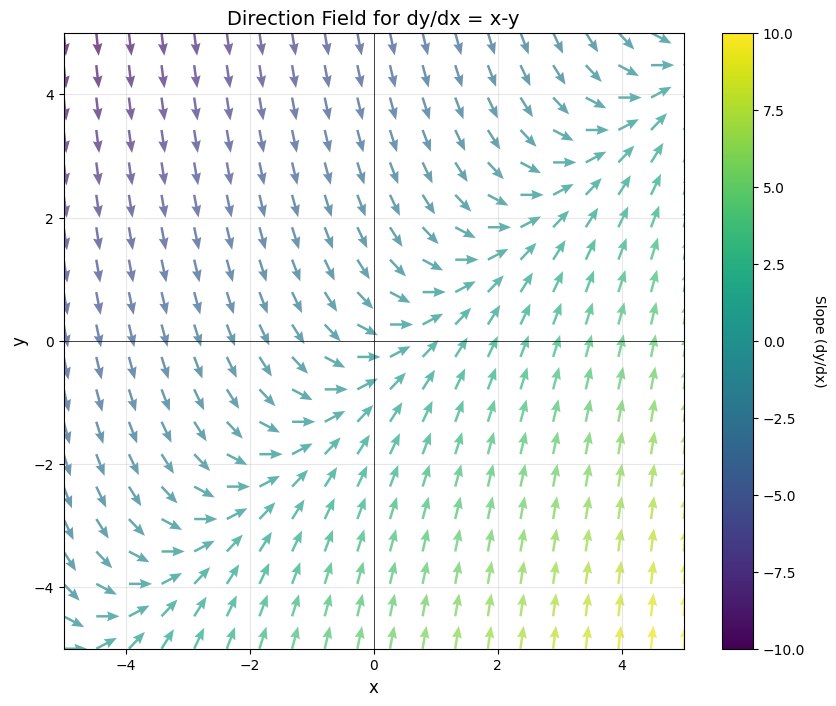

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def evaluate_function(func_str, x, y):
    """Safely evaluate the user's function"""
    try:
        # Create a safe namespace with numpy functions
        namespace = {
            'x': x, 'y': y,
            'sin': np.sin, 'cos': np.cos, 'tan': np.tan,
            'exp': np.exp, 'log': np.log, 'sqrt': np.sqrt,
            'pi': np.pi, 'e': np.e,
            'abs': np.abs, 'arcsin': np.arcsin, 'arccos': np.arccos,
            'arctan': np.arctan, 'sinh': np.sinh, 'cosh': np.cosh,
            'tanh': np.tanh
        }
        result = eval(func_str, {"__builtins__": {}}, namespace)
        return result
    except Exception as e:
        print(f"Error evaluating function: {e}")
        return None

def plot_direction_field(func_str, x_min=-5, x_max=5, y_min=-5, y_max=5):
    """Generate and plot the direction field for given differential equation"""

    fig, ax = plt.subplots(figsize=(10, 8))

    # Create grid of points
    x_range = np.linspace(x_min, x_max, 20)
    y_range = np.linspace(y_min, y_max, 20)
    X, Y = np.meshgrid(x_range, y_range)

    # Calculate slopes at each point
    slopes = evaluate_function(func_str, X, Y)

    if slopes is None:
        ax.text(0, 0, 'Invalid function!', ha='center', va='center',
                fontsize=16, color='red')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        plt.show()
        return

    # Convert to array if it's a constant
    if np.isscalar(slopes):
        slopes = np.full_like(X, slopes)

    # Calculate direction vectors
    dx = np.ones_like(slopes)
    dy = slopes

    # Normalize the vectors for better visualization
    magnitude = np.sqrt(dx**2 + dy**2)
    dx = dx / magnitude * 0.3
    dy = dy / magnitude * 0.3

    # Plot the direction field
    ax.quiver(X, Y, dx, dy, slopes, cmap='viridis',
              alpha=0.7, scale=8, width=0.004,
              headwidth=4, headlength=5)

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap='viridis')
    sm.set_array(slopes.flatten())
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Slope (dy/dx)', rotation=270, labelpad=15)

    # Set labels and title
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title(f'Direction Field for dy/dx = {func_str}', fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    plt.show()

if __name__ == "__main__":
    print("Direction Field Generator")
    print("=" * 60)
    print("Enter a differential equation in terms of x and y")
    print("\nExamples:")
    print("  - Linear: x - y")
    print("  - Nonlinear: x**2 + y**2")
    print("  - Trigonometric: sin(x) * cos(y)")
    print("  - Exponential: exp(-x) * y")
    print("  - Product: x*y")
    print("\nAvailable functions:")
    print("  sin, cos, tan, exp, log, sqrt, abs")
    print("  arcsin, arccos, arctan, sinh, cosh, tanh")
    print("  Mathematical operators: +, -, *, /, **")
    print("=" * 60)

    # Get user input
    func_input = input("\nEnter your differential equation dy/dx = ")

    # Get x range
    while True:
        x_range_input = input("Enter x range (format: min, max) or press Enter for default -5, 5: ")
        if x_range_input.strip():
            try:
                parts = x_range_input.split(',')
                if len(parts) != 2:
                    raise ValueError
                x_min, x_max = map(float, parts)
                if x_min >= x_max:
                    print("Error: min must be less than max")
                    print("Example: -10, 10")
                    continue
                break
            except:
                print("Invalid range format!")
                print("Example: -10, 10  or  0, 5")
                continue
        else:
            x_min, x_max = -5, 5
            break

    # Get y range
    while True:
        y_range_input = input("Enter y range (format: min, max) or press Enter for default -5, 5: ")
        if y_range_input.strip():
            try:
                parts = y_range_input.split(',')
                if len(parts) != 2:
                    raise ValueError
                y_min, y_max = map(float, parts)
                if y_min >= y_max:
                    print("Error: min must be less than max")
                    print("Example: -10, 10")
                    continue
                break
            except:
                print("Invalid range format!")
                print("Example: -10, 10  or  0, 5")
                continue
        else:
            y_min, y_max = -5, 5
            break

    # Generate and display the direction field
    plot_direction_field(func_input, x_min, x_max, y_min, y_max)